In [1]:
path = 'exams.csv'

In [2]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.396,15.402871,13.0,56.0,66.5,77.0,100.0
reading score,1000.0,69.002,14.737272,27.0,60.0,70.0,79.0,100.0
writing score,1000.0,67.738,15.600985,23.0,58.0,68.0,79.0,100.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.shape

(1000, 8)

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff38987d9d0>,
      dtype=object)

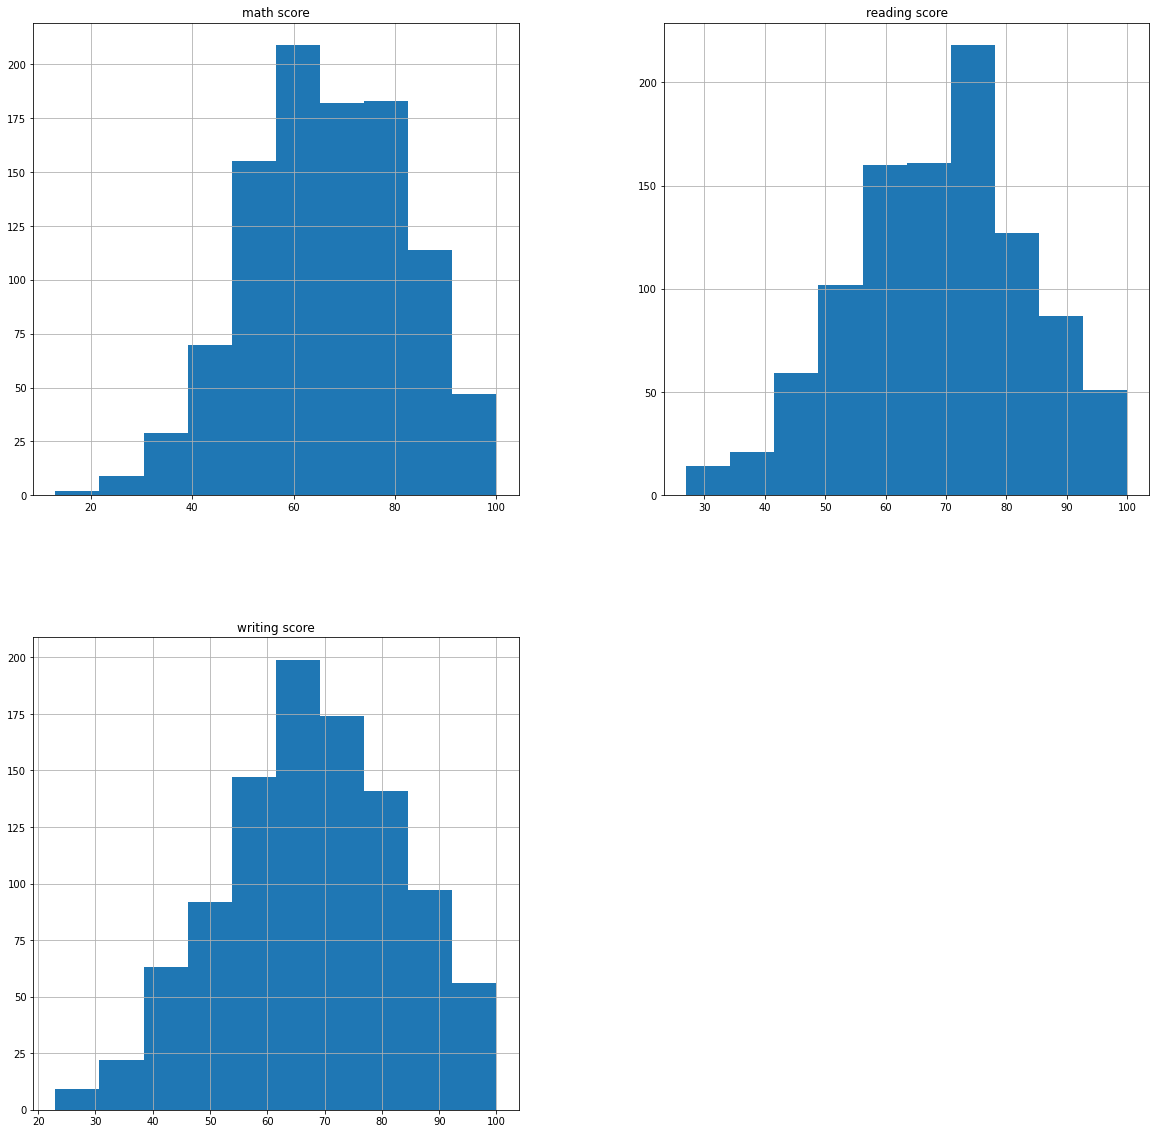

In [9]:
%matplotlib inline
df.hist(figsize=(20,20))

In [10]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


math score      -0.151147
reading score   -0.191665
writing score   -0.153621
dtype: float64

For  math score  :


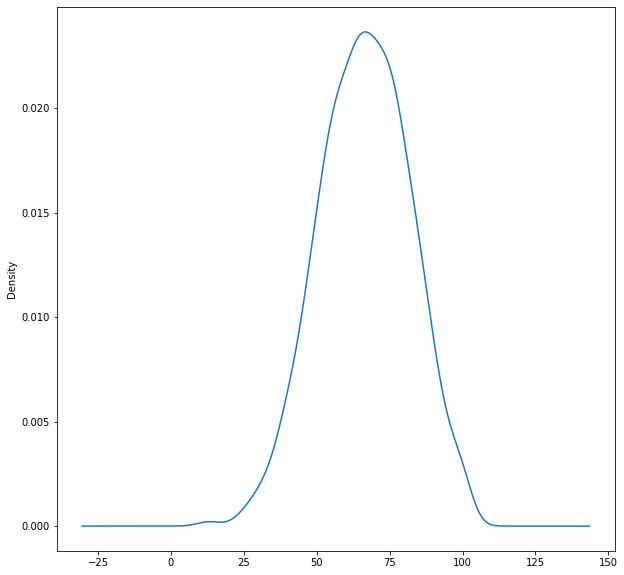


For  reading score  :


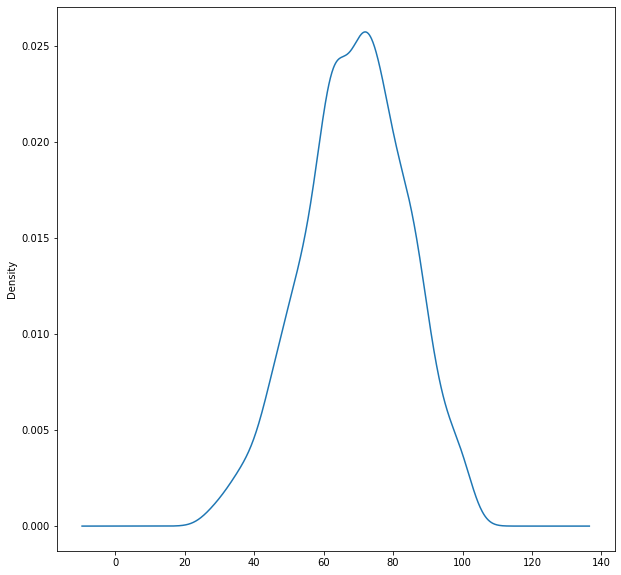


For  writing score  :


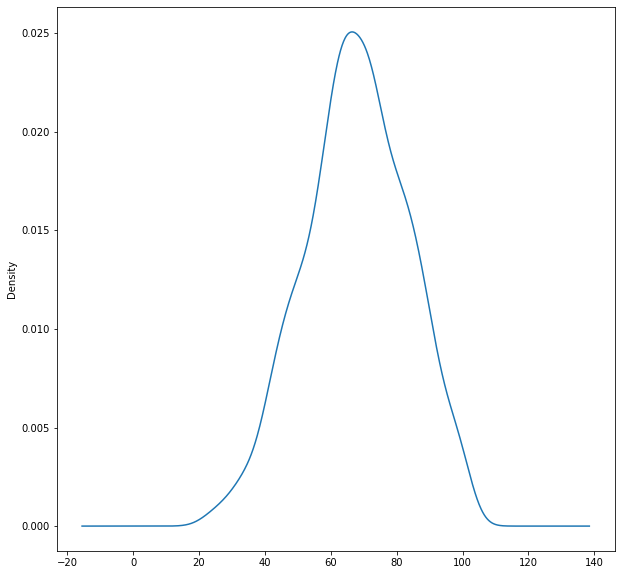

In [11]:
num_col = ['math score','reading score','writing score']

for i in num_col:
  print('For ',i,' :')
  plt.figure(figsize=(10,10))
  df[i].plot(kind='density')
  plt.show()
  print()

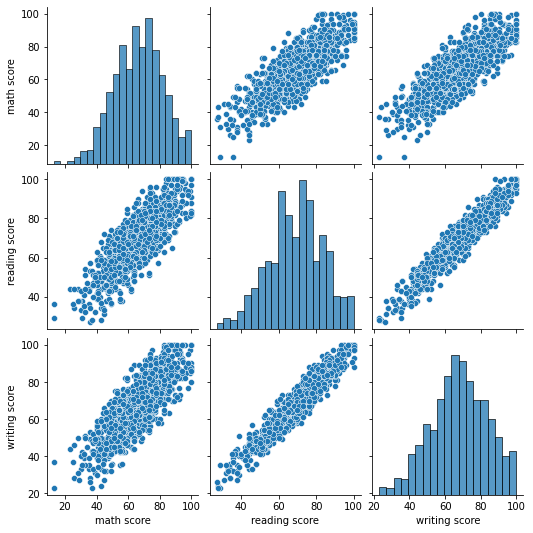

In [12]:
sns.pairplot(df)

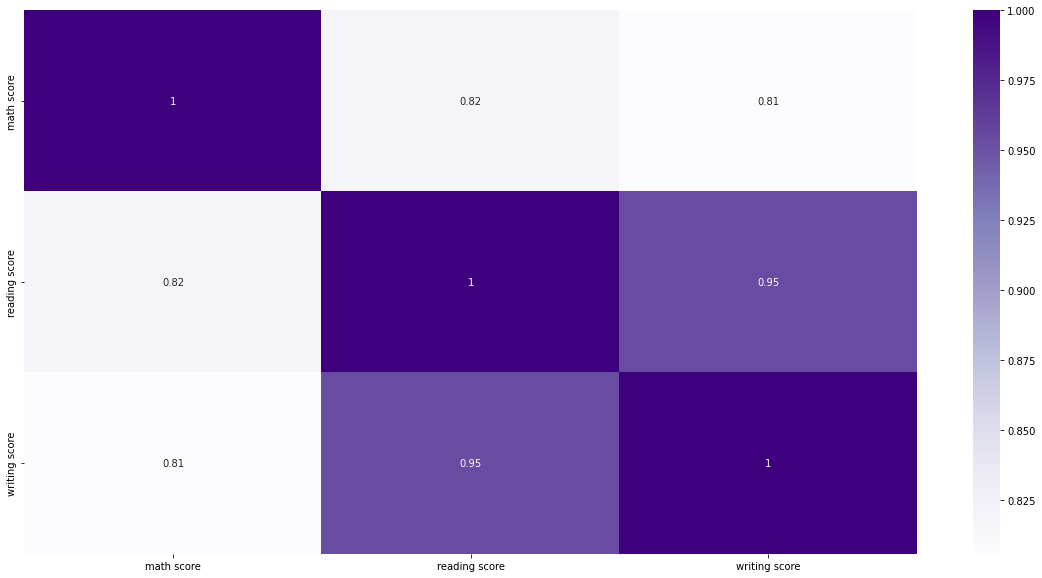

In [17]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='Purples',annot=True)

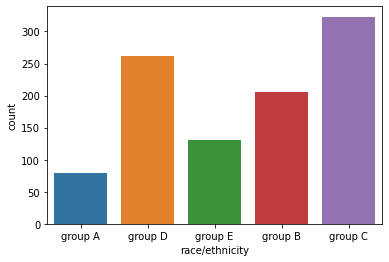

In [22]:
sns.countplot(x='race/ethnicity', data=df)

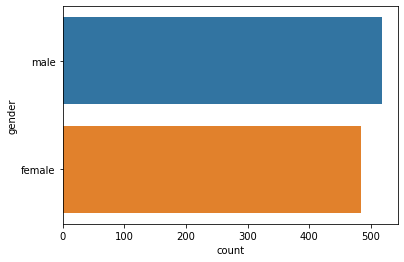

In [25]:
sns.countplot(y='gender', data=df)

                lunch     
gender         female male
race/ethnicity            
group A            37   42
group B           114   91
group C           154  169
group D           126  136
group E            52   79


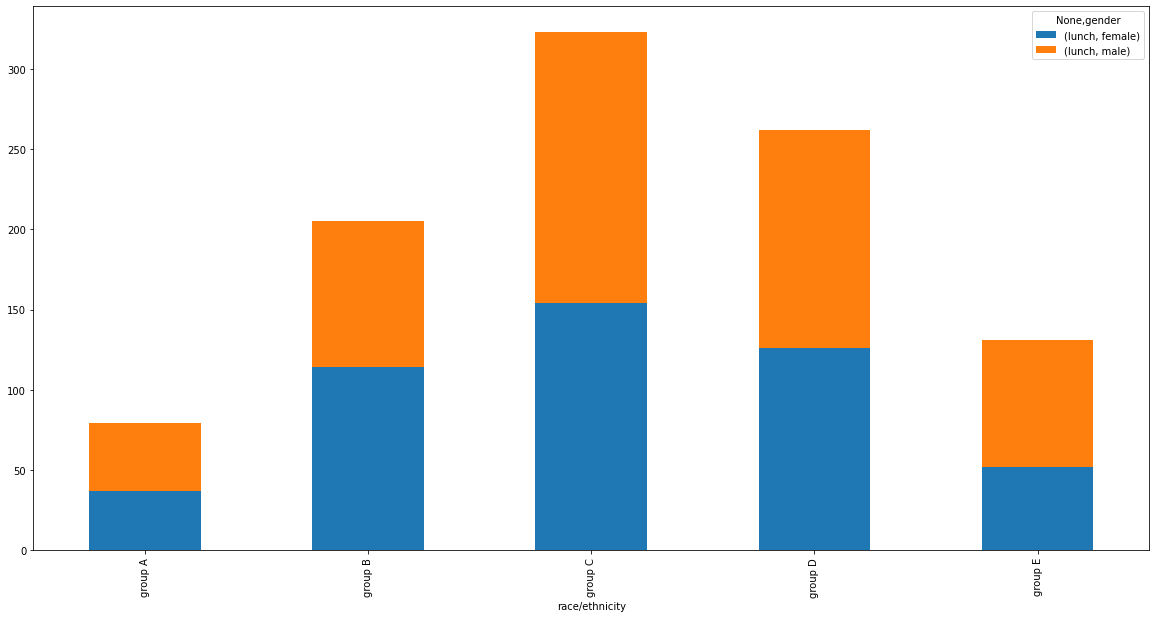

In [38]:
x = pd.pivot_table(df, index=['race/ethnicity'], 
                   columns=['gender'], values=['lunch'], aggfunc='count')

print(x)

x.plot.bar(stacked=True,figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3840d4790>,
      dtype=object)

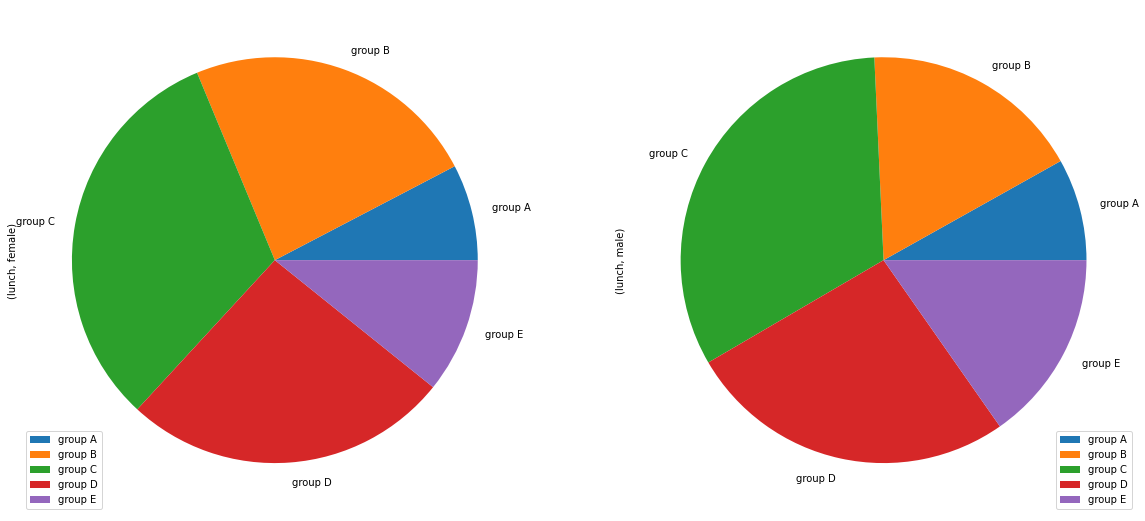

In [39]:
x.plot.pie(subplots=True,figsize=(20,10))

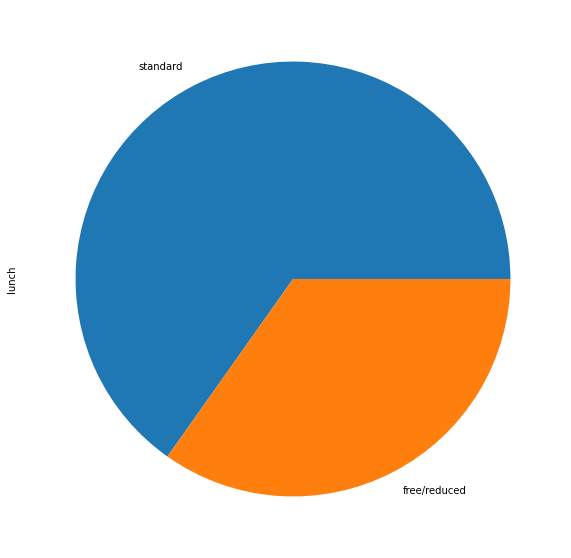

In [42]:
df['lunch'].value_counts().plot.pie(figsize=(20,10))

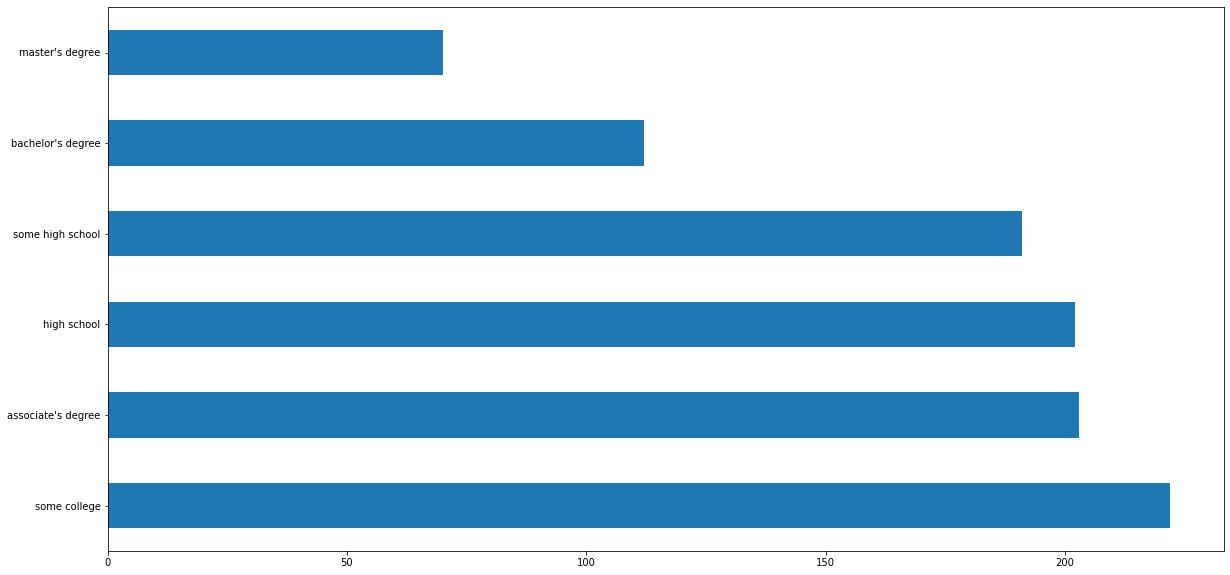

In [50]:
df['parental level of education'].value_counts().plot.barh(figsize=(20,10))